### Linear Regression

#### Y = wX + b
Y --> Dependent Variable

X --> Indepedent Variable

w --> Weight

b --> Bias

### Gradient Descent
Gradient Descent is an optimization algorithm used for minimizing the loass function in various machine learning algorithms. It is used for updating the parameters of the learning model.

w = w - a * dw

b = b - a * db

#### Importing the Dependencies

In [4]:
# Importing numpy library
import numpy as np

### Linear Regression

In [25]:
class Linear_Regression():
    def __init__(self, learning_rate, no_of_iterations):
        self.learning_rate = learning_rate
        self.no_of_iterations = no_of_iterations
    
    # fit functions to train the model
    def fit (self, X, Y):
        self.m, self.n = X.shape
        
        # initiating the weight and bias
        self.w = np.zeros(self.n)
        self.b = 0
        self.X = X
        self.Y = Y
        
        # implementing Gradient Descent for Optimization
        for i in range(self.no_of_iterations):
            self.update_weight()
        
        # function to update weights in gradient descent
    def update_weight(self):
        Y_prediction = self.predict(self.X)
            
        #calculate gradients
        dw = -( 2 * ( self.X.T). dot ( self.Y - Y_prediction ) ) / self.m
        db = - 2 * np.sum ( self.Y - Y_prediction) / self.m
            
        # Updating the weights
        self.w = self.w - self.learning_rate * dw
        self.b = self.b - self.learning_rate * db
            
    # Line function for prediction
    def predict( self, X):
        return X.dot( self.w ) + self.b
    

### Using Linear Regression model for Prediction 

In [26]:
# Importing the dependencies

import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

### Data Pre-Processing

In [27]:
# loading the data from csv file to a pandas DataFrame
salary_data = pd.read_csv('G:\\Data Bases For 99DaysWithCPC\\Building Machine Learning model\\salary_data.csv')

In [28]:
# printing the first 5 columns of the dataframe
salary_data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [29]:
# last 5 rows of the dataframe
salary_data.tail()

,YearsExperience,Salary
25,9.0,105582
26,9.5,116969
27,9.6,112635
28,10.3,122391
29,10.5,121872


In [30]:
# number of rows and columns in the dataframe
salary_data.shape

(30, 2)

In [31]:
# checking for missing values
salary_data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

### Spliting the feature and target

In [32]:
X = salary_data.iloc[:, :-1].values
Y = salary_data.iloc[:,1].values

In [33]:
X

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [34]:
Y

array([ 39343,  46205,  37731,  43525,  39891,  56642,  60150,  54445,
        64445,  57189,  63218,  55794,  56957,  57081,  61111,  67938,
        66029,  83088,  81363,  93940,  91738,  98273, 101302, 113812,
       109431, 105582, 116969, 112635, 122391, 121872], dtype=int64)

### Spliting the dataset into training and test data

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=2)

### Training the Linear_Regression model

In [45]:
model = Linear_Regression(learning_rate=0.02, no_of_iterations=10000)

In [46]:
model.fit(X_train, y_train)

In [47]:
# Printing the parameter values ( weights and bias )
print( 'Weight = ', model.w[0])
print( 'Bias = ', model.b)

Weight =  9512.944987627438
Bias =  23707.813246575228


### Predict the salary value for test data

In [48]:
test_data_prediction = model.predict(X_test)

In [49]:
test_data_prediction

array([ 36074.64173049,  34172.05273297,  66516.0656909 ,  58905.7097008 ,
        91249.72265873,  80785.48317234, 101713.96214512,  52246.64820946,
        42733.70322183,  88395.83916244])

### Visualizing the predicted Values and actual Values

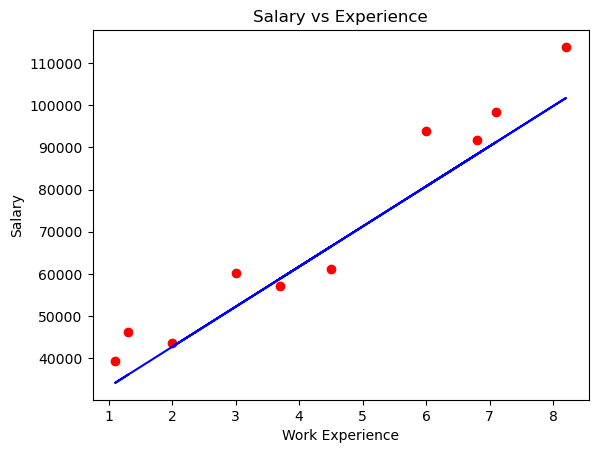

In [50]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_test, test_data_prediction, color = 'blue')
plt.xlabel('Work Experience')
plt.ylabel('Salary')
plt.title('Salary vs Experience')
plt.show()